In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [101]:
# Import data
data = pd.read_csv('/kaggle/input/calcofi/bottle.csv')
data = pd.DataFrame(data)
data.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Remove unnecessary columns
data = data[['Salnty', 'T_degC']]
# Limiting amount of entries to speed up regression time
data = data[:][:500]

In [103]:
# Data cleaning
print(data.isnull().sum())
data['Salnty'].fillna(data['Salnty'].mean(), inplace = True)
data['T_degC'].fillna(data['T_degC'].mean(), inplace = True)
print(data.isnull().sum())

Salnty    6
T_degC    1
dtype: int64
Salnty    0
T_degC    0
dtype: int64


In [105]:
# Split features and labels
X = np.array(data['Salnty']).reshape(-1, 1)
y = np.array(data['T_degC']).reshape(-1, 1)

In [106]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [107]:
# Fit SLR model to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.8470149492179591


In [108]:
# Predicting test set results
y_pred = regressor.predict(X_test)

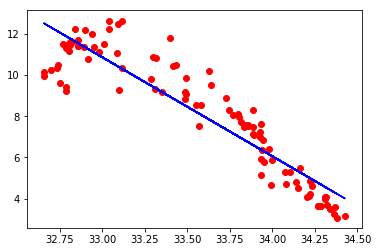

In [109]:
# Visualize test set results
plt.scatter(X_test , y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.show()